In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('flood_dataset.csv')

df.head(10)

,tempmax,temp,humidity,precip,precipprob,precipcover,snowdepth,windspeed,cloudcover,Class
0,30.400000,25.600000,43.100000,0.000000,4.800000,0.000000,0.000000,18.700000,47.800000,0
1,28.600000,23.000000,34.800000,0.000000,0.000000,0.000000,0.000000,11.200000,99.700000,0
2,25.800000,17.600000,37.600000,0.000000,4.800000,0.000000,0.000000,11.500000,0.000000,0
3,28.100000,22.500000,62.600000,0.000000,9.500000,0.000000,0.000000,11.200000,39.300000,0
4,29.000000,23.200000,68.000000,0.000000,9.500000,0.000000,0.000000,16.900000,28.100000,0
5,28.291027,27.216411,72.805903,8.785124,48.429513,21.894325,0.092426,18.350529,65.665166,1
6,27.400000,21.200000,35.500000,0.000000,14.300000,0.000000,0.000000,16.900000,16.600000,0
7,26.400000,20.500000,46.800000,0.000000,0.000000,0.000000,0.000000,9.400000,59.500000,0
8,30.862270,26.563207,86.692936,23.017443,96.997656,88.817871,0.000000,24.752328,93.011785,1
9,30.100000,23.800000,43.100000,0.000000,4.800000,0.000000,0.000000,11.900000,51.500000,0


In [37]:
# 1. Handling Missing Values
df.fillna(df.mean(), inplace=True)


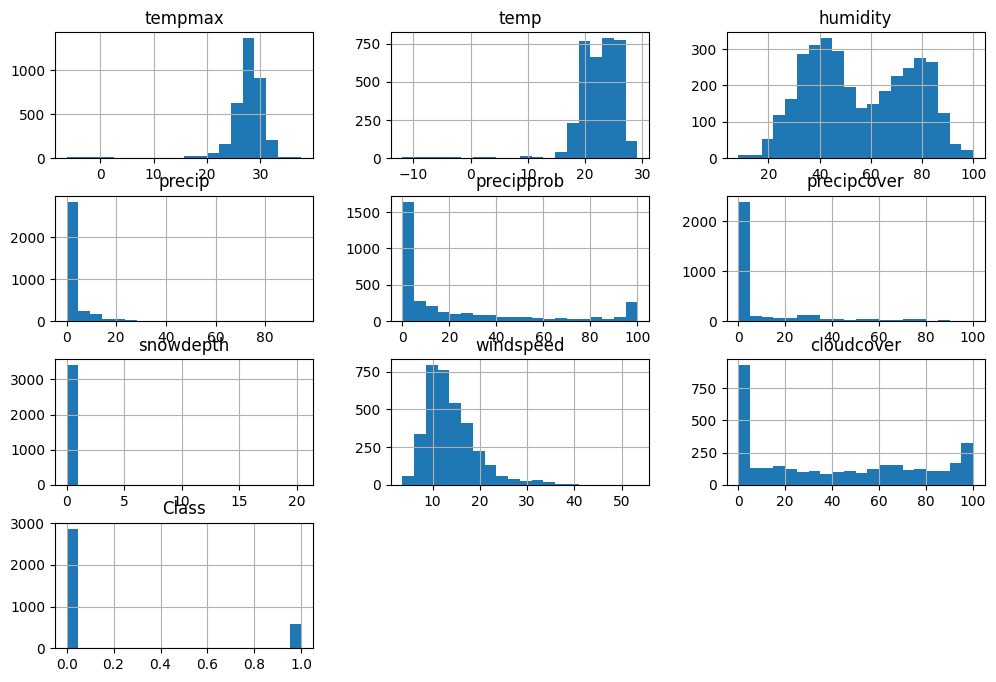

In [38]:
df.hist(figsize=(12, 8), bins=20)
plt.show()

<Axes: >

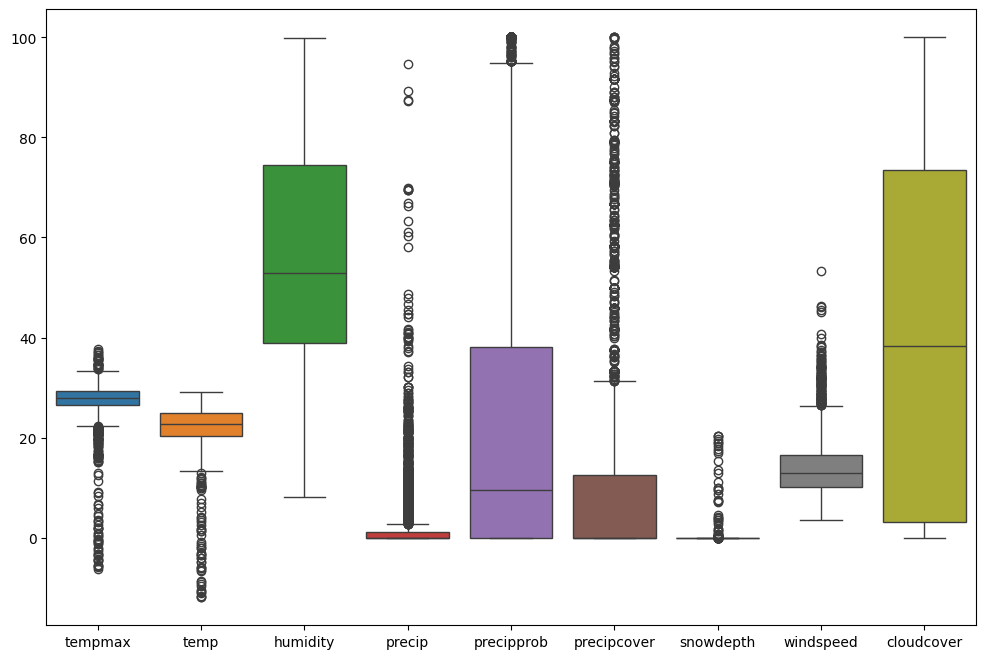

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop('Class', axis=1))

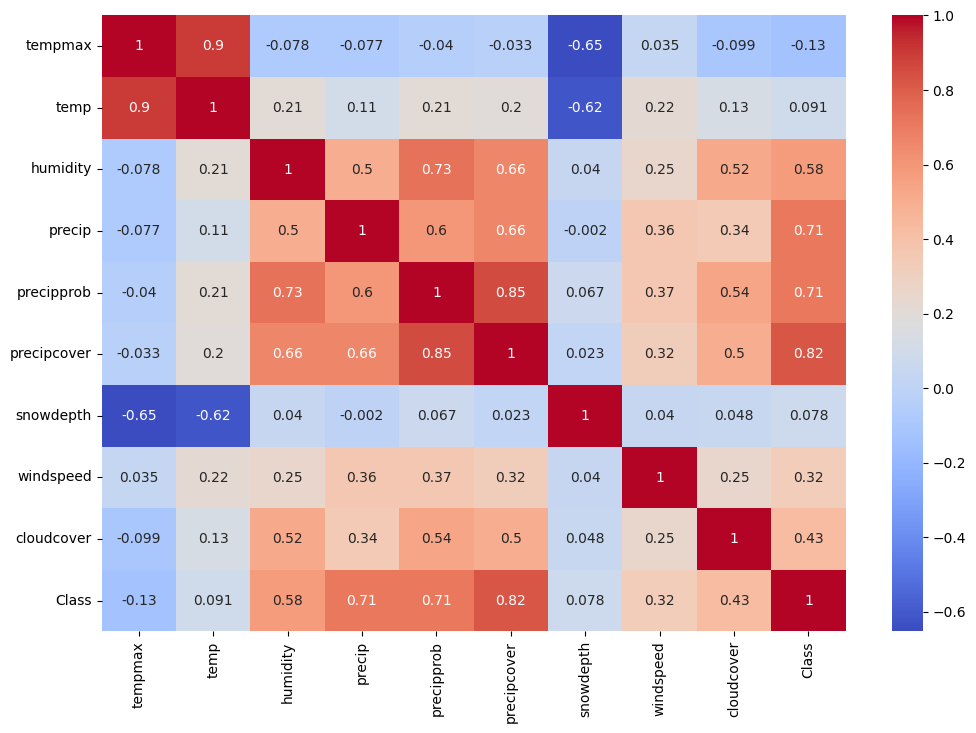

In [40]:
#Correction Matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [41]:
#Train-Test Split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

feature_columns = X_train.columns

# 1. Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# 2. Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# 3. Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train[feature_columns], y_train)

# 4. Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 5. Use the best model for predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test[feature_columns])

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 7. View detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9970972423802612
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       0.99      0.99      0.99       111

    accuracy                           1.00       689
   macro avg       0.99      0.99      0.99       689
weighted avg       1.00      1.00      1.00       689



Accuracy: 0.9970972423802612
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       0.99      0.99      0.99       111

    accuracy                           1.00       689
   macro avg       0.99      0.99      0.99       689
weighted avg       1.00      1.00      1.00       689



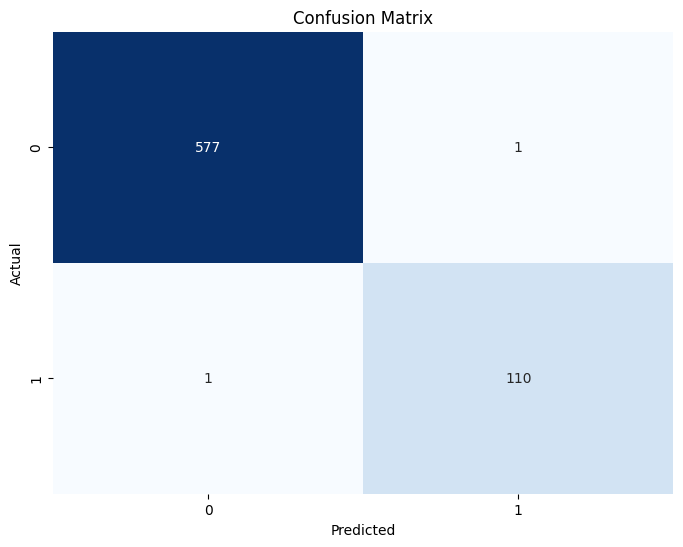

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

feature_columns = X_train.columns

# 1. Use the best model for predictions
y_pred = best_rf_model.predict(X_test[feature_columns])

# 2. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 3. View detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4. Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [44]:
# Assuming 'loaded_model' is your loaded Random Forest model
# Replace 'your_input_data' with your actual input data
# Replace 'your_feature_columns' with the actual feature columns used during training

# Create a DataFrame with the input data and feature names
input_data = np.array([25.8, 21.3, 86.2, 11.4, 69.5, 77.5, 0.0, 9.4, 52.2]).reshape(1, -1)
input_df = pd.DataFrame(input_data, columns=['tempmax','temp','humidity','precip','precipprob','precipcover','snowdepth','windspeed','cloudcover'])

# Make predictions

prediction = best_rf_model.predict(input_df)
print(prediction)



[1]


In [45]:
import pickle

# Save the model to a file
with open('flood_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)